<a href="https://colab.research.google.com/github/Keishin315/Keishin315/blob/main/signate_pm2.5forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook provides a recipe for using Kaggle API with Colab

# **以下分析✈**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

ファイルの読み込み

In [ ]:
traincsv = pd.read_csv('train.csv.zip')

datetimeオブジェクトに変換

In [ ]:
traincsv.date = pd.to_datetime(traincsv["date"])

ソートして、データセットを作る時のfor文を回せるようにする。

In [ ]:
traincsv = traincsv.sort_values(['date','store_nbr','family'])

In [ ]:
train = traincsv.set_index('date').drop('id',axis = 1).copy()
train

,store_nbr,family,sales,onpromotion
date,,,,
2013-01-01,1,AUTOMOTIVE,0.000,0
2013-01-01,1,BABY CARE,0.000,0
2013-01-01,1,BEAUTY,0.000,0
2013-01-01,1,BEVERAGES,0.000,0
2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...
2017-08-15,54,POULTRY,59.619,0
2017-08-15,54,PREPARED FOODS,94.000,0
2017-08-15,54,PRODUCE,915.371,76


データを変数とラベルに分ける

In [ ]:
trainY = train.sales
train = train.drop('sales',axis = 1)

In [ ]:
train = np.array(train)
trainY = np.array(trainY)

データセットを作るための関数（５３＊３３で一つのデータセットとする）

In [ ]:
#datasetを作る

def make_dataset(data,dataY):
  datasetX = []
  yset = []
  max_length = len(data)
  for i in range(54*33*7,max_length-54*33,54*33):
    datasetX.append(data[i-54*33*7:i,2])
    yset.append(dataY[i:i+54*33])

  return datasetX,yset

  

In [ ]:
trainX,trainY = make_dataset(train,trainY)

スケーリングを行い、ネットワークが学習しやすいようにする。

In [ ]:
#scaling
scaler = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler.fit(trainX)  # スケーリングに使用する最小／最大値を計算する。
train = scaler.transform(trainX)  # Xをを0～1の範囲にスケーリングする。

scaler1 = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler1.fit(trainY)  # スケーリングに使用する最小／最大値を計算する。
trainY = scaler1.transform(trainY)  # Yをを0～1の範囲にスケーリングする。

LSTMモデルにinputするためにデータの形を整形

In [ ]:
trainY = np.array(trainY)
trainX = np.array(trainX)
trainX = np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
print(trainY.shape,trainX.shape)

(1676, 1782) (1676, 1, 12474)


In [ ]:
train_X = np.asarray(train_X).astype(np.float32)
train_Y = np.asarray(train_Y).astype(np.float32)

学習データと検証データに分ける

In [ ]:
# train, testデータを定義
train_X = trainX[:1000, :, :]
test_X = trainX[1000:, :, :]
train_Y = trainY[:1000, :]
test_Y = trainY[1000:, :]

In [ ]:
test_X = np.asarray(test_X).astype(np.float32)
test_Y = np.asarray(test_Y).astype(np.float32)

In [ ]:
train_Y

array([[0.10526316, 0.        , 0.25      , ..., 0.        , 0.        ,
        0.04166667],
       [0.10526316, 0.        , 0.08333334, ..., 0.        , 0.        ,
        0.04166667],
       [0.10526316, 0.        , 0.25      , ..., 0.        , 0.        ,
        0.04166667],
       ...,
       [0.05263158, 0.        , 0.16666667, ..., 0.38605216, 0.        ,
        0.20833333],
       [0.2631579 , 0.        , 0.5833333 , ..., 0.2987891 , 0.        ,
        0.29166666],
       [0.42105263, 0.        , 0.25      , ..., 0.35237238, 0.        ,
        0.04166667]], dtype=float32)

LSTMモデルの定義と学習

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(1,54*33*7)))
model.add(Dense(1782))
model.compile(loss='mean_squared_error', optimizer='adam')
hist = model.fit(train_X,train_Y,epochs=20, batch_size=1, verbose=2)

Epoch 1/20
1000/1000 - 10s - loss: 0.0138 - 10s/epoch - 10ms/step
Epoch 2/20
1000/1000 - 9s - loss: 0.0091 - 9s/epoch - 9ms/step
Epoch 3/20
1000/1000 - 9s - loss: 0.0087 - 9s/epoch - 9ms/step
Epoch 4/20
1000/1000 - 9s - loss: 0.0086 - 9s/epoch - 9ms/step
Epoch 5/20
1000/1000 - 9s - loss: 0.0086 - 9s/epoch - 9ms/step
Epoch 6/20
1000/1000 - 9s - loss: 0.0086 - 9s/epoch - 9ms/step
Epoch 7/20
1000/1000 - 9s - loss: 0.0085 - 9s/epoch - 9ms/step
Epoch 8/20
1000/1000 - 9s - loss: 0.0086 - 9s/epoch - 9ms/step
Epoch 9/20
1000/1000 - 9s - loss: 0.0085 - 9s/epoch - 9ms/step
Epoch 10/20
1000/1000 - 9s - loss: 0.0084 - 9s/epoch - 9ms/step
Epoch 11/20
1000/1000 - 9s - loss: 0.0084 - 9s/epoch - 9ms/step
Epoch 12/20
1000/1000 - 9s - loss: 0.0084 - 9s/epoch - 9ms/step
Epoch 13/20
1000/1000 - 9s - loss: 0.0084 - 9s/epoch - 9ms/step
Epoch 14/20
1000/1000 - 9s - loss: 0.0084 - 9s/epoch - 9ms/step
Epoch 15/20
1000/1000 - 9s - loss: 0.0084 - 9s/epoch - 9ms/step
Epoch 16/20
1000/1000 - 9s - loss: 0.0084 - 9s

検証データの予測

In [ ]:
Predict = model.predict(test_X)

In [ ]:
Predict.shape

(676, 1782)

スケールを戻す

In [ ]:
#scaleを元に戻す
train_Y = scaler1.inverse_transform(train_Y)
train_Y = pd.DataFrame(train_Y)


test_Y = scaler1.inverse_transform(test_Y)
test_Y = pd.DataFrame(test_Y)




In [ ]:
Predict = scaler1.inverse_transform(Predict)
Predict = pd.DataFrame(Predict)


最初の５０個の正解データと予測データを可視化して比較してみる。

In [ ]:
import matplotlib.pyplot as plt

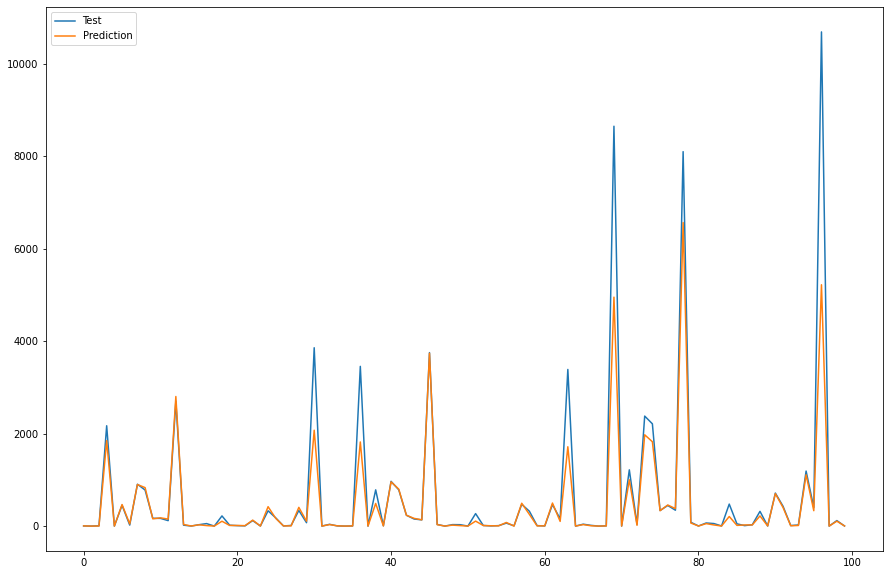

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(test_Y.iloc[0,:100], label = 'Test')
plt.plot(Predict.iloc[0,:100], label = 'Prediction')
plt.legend(loc='best')
plt.show()



#





#以下、提出データの作成（とても雑になりました。時間がある時にまたまとめます）


---



In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
test.date = pd.to_datetime(test.date)

In [ ]:
tests = pd.read_csv('test.csv')

In [ ]:
28512 - 5346

23166

In [ ]:
23166/54/33

13.0

In [ ]:
7128/1782

4.0

In [ ]:
54*33

1782

In [ ]:
def make_dataset_t(data):
  datasetX = []
  max_length = len(data)
  for i in range(54*33*7,max_length-54*33+1,54*33):
    datasetX.append(data[i-54*33*7:i,1])

  return datasetX

In [ ]:

test = test.sort_values(['date','store_nbr','family'])

test = test.set_index('date').drop(['id','family'],axis = 1).copy()

test = np.array(test)
test = make_dataset_t(test)

test = np.array(test)
test = np.asarray(test).astype(np.float32)
#scaling  # データを0～1の範囲にスケールするための関数。
scaler.fit(test)  # スケーリングに使用する最小／最大値を計算する。
test1 = scaler.transform(test)  # Xをを0～1の範囲にスケーリングする。


test1 = np.reshape(test1,(test1.shape[0],1,test1.shape[1]))
print(test1.shape)

(9, 1, 12474)


In [ ]:
test1.shape

(9, 1, 12474)

In [ ]:
sub = model.predict(test1)

In [ ]:
sub.shape

(9, 1782)

In [ ]:
1782*16

28512

In [ ]:
sub=pd.DataFrame(sub)

In [ ]:
sub = scaler1.inverse_transform(sub)

In [ ]:
subm = []
for i in sub:
  for k in i:
    subm.append(k)

subm = pd.DataFrame(subm)
subm

,0
0,3.941776
1,-0.000023
2,2.663698
3,1598.146851
4,0.002273
...,...
16033,52.930943
16034,75.043999
16035,666.414368
16036,0.011224


# **ii)**

In [ ]:
hosokumi = hosokumi.drop('index',axis = 1)

In [ ]:
hosokumi['id'] = pd.DataFrame(list(range(3000888,3029400)))
hosokumi = hosokumi.set_index(['id'])

In [ ]:
hosokumi['sales'] = hosokumi.iloc[:,0].copy()

In [ ]:
hosokumi = hosokumi.drop(0,axis = 1)

In [ ]:
hosokumi

,sales
id,
3000888,3.995968
3000889,4.546751
3000890,3.649341
3000891,4.179337
3000892,4.549112
...,...
3029395,52.930943
3029396,75.043999
3029397,666.414368


In [ ]:
hosokumi.to_csv('pred.csv')

In [ ]:
!kaggle competitions submit -c store-sales-time-series-forecasting -f pred.csv -m test

100% 741k/741k [00:02<00:00, 350kB/s]
400 - Bad Request


# **i)**

In [ ]:
spe = traincsv.sort_values(['date','store_nbr','family']).drop(['id','sales'],axis = 1).copy()

In [ ]:
spe = spe.iloc[-54*33*7:,:]
spe = spe.drop(['store_nbr','family'],axis = 1)

In [ ]:
testdash = tests.sort_values(['date','store_nbr','family'])[:54*33*7]

In [ ]:
spe = spe.onpromotion.append(testdash.onpromotion)

In [ ]:
spe = spe.reset_index()

In [ ]:
spe = spe.drop('index',axis = 1)

In [ ]:
spe = np.array(spe)

In [ ]:
datasetX = []
max_length = len(spe)
for i in range(54*33*7,max_length-54*33+1,54*33):
  datasetX.append(spe[i-54*33*7:i,0])
datasetX

[array([ 0,  0,  1, ..., 76,  0,  0]),
 array([  0,   0,   1, ..., 225,  14,   0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 2, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 1]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0])]

In [ ]:
datasetX = np.array(datasetX)

In [ ]:
scaler.fit(datasetX)  # スケーリングに使用する最小／最大値を計算する。
datasetX = scaler.transform(datasetX)

In [ ]:
datasetX.shape

(7, 12474)

In [ ]:
datasetX = np.reshape(datasetX,(7,1,54*33*7))
datasetX.shape

(7, 1, 12474)

In [ ]:
hosoku = model.predict(datasetX)

In [ ]:
hosoku = pd.DataFrame(hosoku)
hosoku = scaler1.inverse_transform(hosoku)

In [ ]:
hosoku = pd.DataFrame(hosoku)
hosoku

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1742,1743,1744,1745,1746,1747,1748,1749,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781
0,3.995968,0.000543,2.636803,1641.253052,0.003242,419.097504,55.342678,759.111694,734.152466,144.078918,152.385498,108.329094,2413.660889,28.070539,1.353321,24.941967,11.675253,0.362591,95.445572,11.658013,9.202316,7.415528,85.577988,1.380316,300.546021,158.246109,3.696124,4.876364,285.887909,87.803123,1671.983276,0.179525,23.204994,5.176668,0.006449,3.272644,2107.801514,-0.011344,549.650574,3.831339,...,1.030914,1.887752,152.053345,55.457088,946.593323,0.122435,3.757807,5.198446,0.171946,0.387089,1060.526001,0.000098,228.934250,1.801574,998.792908,167.720413,197.643677,96.278526,30.692831,2210.402344,12.327898,0.506014,19.870266,10.363843,0.245078,111.049866,-0.000906,-0.000356,3.039680,28.315926,0.132664,47.131138,167.728729,0.129616,1.038239,49.548340,66.554367,267.614960,-0.004671,2.070900
1,4.546751,0.002034,3.001528,2216.398193,0.008118,388.740753,44.227798,688.554260,691.679138,128.843170,135.276611,105.509705,2271.056396,26.220028,2.053804,34.244583,16.826893,0.140147,196.557663,24.680180,7.009838,7.948660,66.541245,2.538657,227.507812,146.952286,8.303677,10.131473,246.858841,82.801300,3114.851318,0.415244,18.257769,5.837735,0.009295,3.954183,3364.441650,-0.017395,593.977539,13.566987,...,2.143176,4.924546,157.103073,59.538666,1891.724854,0.636850,3.528798,6.292316,0.487610,0.161336,1585.158325,-0.001435,245.543701,5.797374,1104.167725,175.178528,208.441833,96.716591,36.870758,2443.680176,13.061445,0.833315,24.269201,15.383537,0.105871,246.997604,-0.002413,-0.000802,3.626757,21.408855,0.230412,47.744522,186.981369,0.256807,2.876499,52.985924,75.133644,667.027710,0.012934,2.058126
2,3.649341,0.000171,2.477271,1423.063354,0.004217,361.096222,42.092381,627.712097,627.329834,131.511078,132.807800,86.866516,2042.727051,21.597775,1.118525,22.812513,9.617498,0.278147,77.769409,9.047619,6.188002,5.694528,69.680450,1.313302,299.855621,139.240845,3.099838,4.064709,254.020706,77.042747,1247.489624,0.115390,20.613419,4.917544,0.004756,3.678199,2462.256348,-0.011450,592.908447,4.432489,...,1.323873,2.388490,174.205627,60.694519,953.676575,0.169708,4.592338,5.832437,0.202206,0.485880,1244.853760,0.000311,268.624481,2.068509,1192.875244,201.086029,230.816940,111.670387,30.191975,2668.282959,13.100226,0.726536,22.520767,12.048058,0.239781,151.901443,-0.000527,-0.000193,4.267794,27.332054,0.147522,55.977211,203.410110,0.137372,1.178517,58.199062,72.870079,328.594940,0.037701,2.121623
3,4.179337,-0.000632,2.684692,1549.133423,-0.002324,393.852509,14.581836,667.928711,747.887878,142.995895,168.486176,78.871674,2337.211426,23.942015,1.584291,27.765862,8.032255,0.372017,62.297901,7.541903,6.854747,6.344753,142.438400,1.260763,296.611145,165.595901,2.878768,2.495218,284.655151,95.835594,1010.487915,0.025044,25.363344,5.944371,0.019600,3.835521,2346.172363,-0.011913,608.873352,4.474254,...,0.586238,0.933501,177.344742,58.748314,601.371094,0.341759,5.019537,6.118000,0.220826,0.495427,883.235046,0.002499,241.507401,2.507286,1083.973267,195.184509,222.236923,110.430580,32.908772,2518.419922,13.681838,0.851241,23.037970,9.164290,0.291062,102.738953,0.001042,0.003028,5.116193,53.648094,0.188219,56.024288,201.455307,0.117577,0.504718,58.920650,59.794140,193.849182,0.177157,1.693477
4,4.549112,0.001891,2.991312,2211.282471,0.006567,387.443665,43.797565,685.783203,689.514038,128.662567,134.965073,104.855682,2264.239014,26.102047,2.039450,34.037224,16.662415,0.136988,195.755249,24.580536,6.973378,7.890770,66.387802,2.528757,228.862335,146.515228,8.277020,10.090800,247.613022,82.573807,3104.421143,0.413167,18.331242,5.825563,0.008690,3.992082,3369.695557,-0.017501,595.027405,13.575078,...,2.147094,4.921750,157.583481,59.627098,1892.890503,0.6

In [ ]:
hosokum = []
for i in hosoku:
    for k in hosoku[i]:
      hosokum.append(k)


In [ ]:
hosokumi = pd.DataFrame(hosokum)

In [ ]:
hosokumi = hosokumi.append(subm)

In [ ]:
hosokumi = hosokumi.reset_index()

In [ ]:
hosokumi


,index,0
0,0,3.995968
1,1,4.546751
2,2,3.649341
3,3,4.179337
4,4,4.549112
...,...,...
28507,16033,52.930943
28508,16034,75.043999
28509,16035,666.414368
28510,16036,0.011224
